### Import necessary functions

In [37]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
import matplotlib as mpl

import numpy as np
import dill

import JM_general_functions as jmf
import JM_custom_figs as jmfig

### This code sets the color scheme

In [15]:
green = mpl.colors.to_rgb('xkcd:kelly green')
light_green = mpl.colors.to_rgb('xkcd:light green')
almost_black = mpl.colors.to_rgb('#262626')

col={}
col['np_cas'] = 'xkcd:silver'
col['np_malt'] = 'white'
col['lp_cas'] = green
col['lp_malt'] = light_green

### Sets several default figure parameters - many of these may want to be changed for the poster

In [ ]:
mpl.rcParams['figure.figsize'] = (4.8, 3.2)
mpl.rcParams['figure.dpi'] = 100

mpl.rcParams['font.size'] = 8.0
mpl.rcParams['axes.labelsize'] = 'medium'
mpl.rcParams['ytick.labelsize'] = 'small'
mpl.rcParams['figure.subplot.bottom'] = 0.05

mpl.rcParams['errorbar.capsize'] = 5

mpl.rcParams['savefig.transparent'] = True

mpl.rcParams['axes.spines.top']=False
mpl.rcParams['axes.spines.right']=False

mpl.rc('lines', linewidth=0.5)
mpl.rc('axes', linewidth=1, edgecolor=almost_black, labelsize=6, labelpad=4)
mpl.rc('patch', linewidth=1, edgecolor=almost_black)
mpl.rc('font', family='Arial', size=6)
for tick,subtick in zip(['xtick', 'ytick'], ['xtick.major', 'ytick.major']):
    mpl.rc(tick, color=almost_black, labelsize=6)
    mpl.rc(subtick, width=1)
mpl.rc('legend', fontsize=8)
mpl.rcParams['figure.subplot.left'] = 0.05
mpl.rcParams['figure.subplot.top'] = 0.95

### Load in required dataframes

In [17]:
try:
    pickle_folder = 'R:\\DA_and_Reward\\gc214\\PPP_combined\\output\\'
    
    pickle_in = open(pickle_folder + 'ppp_dfs_sacc.pickle', 'rb')
    df_sacc_behav = dill.load(pickle_in)
    
    pickle_in = open(pickle_folder + 'ppp_dfs_cond1.pickle', 'rb')
    df_cond1_behav, df_cond1_photo = dill.load(pickle_in)
    
    pickle_in = open(pickle_folder + 'ppp_dfs_pref.pickle', 'rb')
    df_behav, df_photo, df_reptraces, df_heatmap, df_reptraces_sip, df_heatmap_sip, longtrace = dill.load(pickle_in)

except FileNotFoundError:
    print('Cannot access pickled file(s)')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:162: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return cls.__new__(cls, **d)


### Set save directory - change for where you want figures saved!!!

In [20]:
savefigs=True
savefolder = 'C:\\Users\\James Rig\\Dropbox\\AbstractsAndTalks\\2019-04-11_BNA_Chiacchierini\\'

### Function and code to make behavioural figure from preference session 1

In [25]:
def pref_behav_fig(ax, df_behav, df_photo, prefsession=1, dietswitch=False, barlabeloffset=[], gs=[], f=[]):

    forced_cas_key = 'pref' + str(prefsession) + '_cas_forced'
    forced_malt_key = 'pref' + str(prefsession) + '_malt_forced'
    free_cas_key = 'pref' + str(prefsession) + '_cas_free'
    free_malt_key = 'pref' + str(prefsession) + '_malt_free'
    choice_cas_key = 'pref' + str(prefsession) + '_ncas'
    choice_malt_key = 'pref' + str(prefsession) + '_nmalt'
    lat_cas_key = 'pref' + str(prefsession) + '_cas_lats_fromsip'
    lat_malt_key = 'pref' + str(prefsession) + '_malt_lats_fromsip'
    pref_key = 'pref' + str(prefsession)
    
    scattersize = 50

    if len(barlabeloffset) < 4:
        barlabeloffset = [0.025, 0.025, 0.025, 0.025]

    if dietswitch == True:
        grouplabel=['NR \u2192 PR', 'PR \u2192 NR']
        barfacecolor = [col['lp_cas'], col['lp_malt'], col['np_cas'], col['np_malt']]
    else:
        grouplabel=['NR', 'PR']
        barfacecolor = [col['np_cas'], col['np_malt'], col['lp_cas'], col['lp_malt']]
    
#panel 1 - forced choice licks    
    x = [[df_behav.xs('NR', level=1)[forced_cas_key], df_behav.xs('NR', level=1)[forced_malt_key]],
         [df_behav.xs('PR', level=1)[forced_cas_key], df_behav.xs('PR', level=1)[forced_malt_key]]]
    jmfig.barscatter(x, paired=True, unequal=True,
                 barfacecoloroption = 'individual',
                 barfacecolor = barfacecolor,
                 scatteredgecolor = ['xkcd:charcoal'],
                 scatterlinecolor = 'xkcd:charcoal',
                 grouplabel=grouplabel,
                 barlabels=['Cas', 'Malt', 'Cas', 'Malt'],
                 barlabeloffset=barlabeloffset[0],
                 scattersize = scattersize,
                 ylim=[-50,1050],
                 xfontsize=6,
                 ax=ax[0])

    ax[0].set_ylabel('Licks')
    ax[0].set_yticks([0, 500, 1000])

#panel 2 - latency for forced choice
    x = [[df_photo.xs('NR', level=1)[lat_cas_key], df_photo.xs('NR', level=1)[lat_malt_key]],
         [df_photo.xs('PR', level=1)[lat_cas_key], df_photo.xs('PR', level=1)[lat_malt_key]]]
    jmfig.barscatter(x, paired=True, unequal=True,
                 barfacecoloroption = 'individual',
                 barfacecolor = barfacecolor,
                 scatteredgecolor = ['xkcd:charcoal'],
                 scatterlinecolor = 'xkcd:charcoal',
                 grouplabel=grouplabel,
                 barlabels=['Cas', 'Malt', 'Cas', 'Malt'],
                 barlabeloffset=barlabeloffset[1],
                 scattersize = scattersize,
                 ylim=[-0.5,10],
                 xfontsize=6,
                 ax=ax[1])
    ax[1].set_ylabel('Latency (s)')
    ax[1].set_yticks([0, 2, 4, 6, 8, 10])

#panel 2 - free choice licks
    x = [[df_behav.xs('NR', level=1)[free_cas_key], df_behav.xs('NR', level=1)[free_malt_key]],
         [df_behav.xs('PR', level=1)[free_cas_key], df_behav.xs('PR', level=1)[free_malt_key]]]
    jmfig.barscatter(x, paired=True, unequal=True,
                 barfacecoloroption = 'individual',
                 barfacecolor = barfacecolor,
                 scatteredgecolor = ['xkcd:charcoal'],
                 scatterlinecolor = 'xkcd:charcoal',
                 grouplabel = grouplabel,
                 barlabels=['Cas', 'Malt', 'Cas', 'Malt'],
                 barlabeloffset=barlabeloffset[2],
                 scattersize = scattersize,
                 ylim=[-50, 800],
                 xfontsize=6,
                 ax=ax[2])

    ax[2].set_ylabel('Licks')
    ax[2].set_yticks([0, 250, 500, 750])

    if prefsession == 1:
        ax[3].axis('off')
    
        x = [df_behav.xs('NR', level=1)[pref_key], df_behav.xs('PR', level=1)[pref_key]]
        jmfig.barscatter(x, paired=False, unequal=True,
                 barfacecoloroption = 'individual',
                 barfacecolor = [barfacecolor[0], barfacecolor[2]],
                 scatteredgecolor = ['xkcd:charcoal'],
                 scatterlinecolor = 'xkcd:charcoal',
                 grouplabel = grouplabel,
                 grouplabeloffset = 0,
                 barlabels=[],
                 barlabeloffset=barlabeloffset[3],
                 scattersize = 25,
                 ylim=[-0.03, 1.1],
                 barwidth = .75,
                 groupwidth = .5,
                 xfontsize=6,
                 spaced=True,
                 xspace=0.06,
                 ax=ax[4])
            
        ax[4].plot(ax[4].get_xlim(), [0.5, 0.5], linestyle='dashed',color='k', alpha=0.3)
        ax[4].set_ylabel('Casein preference')
        ax[4].set_yticks([0, 0.5, 1])
    else:
        inner = gridspec.GridSpecFromSubplotSpec(1,3,subplot_spec=gs[1,1],
                                             width_ratios=[0.3,1,0.2])
        print(f)
        print(type(f))
        new_ax = f.add_subplot(inner[1])
        x = [df_behav.xs('NR', level=1)[pref_key], df_behav.xs('PR', level=1)[pref_key]]
        jmfig.barscatter(x, paired=False, unequal=True,
                 barfacecoloroption = 'individual',
                 barfacecolor = [barfacecolor[0], barfacecolor[2]],
                 scatteredgecolor = ['xkcd:charcoal'],
                 scatterlinecolor = 'xkcd:charcoal',
                 grouplabeloffset = 0,
                 scattersize = 25,
                 ylim=[-0.03, 1.1],
                 barwidth = .75,
                 groupwidth = .5,
                 xfontsize=6,
                 spaced=True,
                 xspace=0.06,
                 ax=new_ax)
        new_ax.plot(new_ax.get_xlim(), [0.5, 0.5], linestyle='dashed',color='k', alpha=0.3)
        new_ax.set_ylabel('Casein preference')
        new_ax.set_yticks([0, 0.5, 1])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


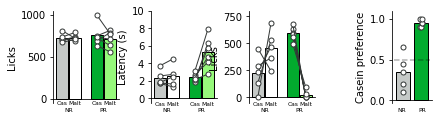

In [26]:
fig1_behav, ax = plt.subplots(figsize=(7.2, 1.75), ncols=5, sharey=False, sharex=False,
                                  gridspec_kw = {'width_ratios':[1, 1, 1, 0.2, 0.6]})
fig1_behav.subplots_adjust(left=0.1, right=0.83, bottom=0.15, wspace=0.65)
pref_behav_fig(ax, df_behav, df_photo, prefsession=1,
                      barlabeloffset=[0.025, 0.035, 0.045, 0.07])
fig1_behav.savefig(savefolder + 'fig1_behav.pdf')

### Functions to make average traces and peak bar graph

In [41]:
def averagetrace(ax, df, diet, keys, event='', fullaxis=True, colorgroup='control', ylabel=True):
    
    if colorgroup == 'control':
        color=[almost_black, 'xkcd:bluish grey']
        errorcolors=['xkcd:silver', 'xkcd:silver']
    else:
        color=[green, light_green]
        errorcolors=['xkcd:silver', 'xkcd:silver']
# Selects diet group to plot                
    df = df.xs(diet, level=1)

# Plots casein and maltodextrin shaded erros
    jmfig.shadedError(ax, df[keys[0]], linecolor=color[0], errorcolor=errorcolors[0], linewidth=2)
    jmfig.shadedError(ax, df[keys[1]], linecolor=color[1], errorcolor=errorcolors[1], linewidth=2)
    
    #ax.legend(['Casein', 'Maltodextrin'], fancybox=True)    
    if fullaxis == False:
        ax.axis('off')

# Adds y scale bar
        y = [y for y in ax.get_yticks() if y>0][:2]
        l = y[1] - y[0]
        scale_label = '{0:.0f}% \u0394F'.format(l*100)
        ax.plot([50,50], [y[0], y[1]], c=almost_black)
        ax.text(40, y[0]+(l/2), scale_label, va='center', ha='right')

# Adds x scale bar   
        y = ax.get_ylim()[0]
        ax.plot([251,300], [y, y], c=almost_black, linewidth=2)
        ax.annotate('5 s', xy=(276,y), xycoords='data',
                    xytext=(0,-5), textcoords='offset points',
                    ha='center',va='top')

    else:
        ax.set_xticks([0, 100, 200, 300])
        ax.set_xticklabels(['-10', '0', '10', '20'])
        ax.set_xlabel('Time from first lick (s)')
        
    if ylabel:
        ax.set_ylabel('Z-Score')

In [46]:
def peakbargraph(ax, df, diet, keys, peaktype='auc', epoch=[100, 149],
                 sc_color='w', colorgroup='control', ylabel=True,
                 ylim=[-0.05, 0.1], grouplabeloffset=0):
    
    if colorgroup == 'control':
        bar_colors=['xkcd:silver', 'w']
    else:
        bar_colors=[green, light_green]
    
    epochrange = range(epoch[0], epoch[1])
    
    df = df.xs(diet, level=1)

    a1 = [np.trapz(rat[epochrange])/10 for rat in df[keys[0]]]
    a2 = [np.trapz(rat[epochrange])/10 for rat in df[keys[1]]]
    ylab = 'AUC'
        
    a = [a1, a2]
    x = jmf.data2obj1D(a)
    
    ax, x, _, _ = jmfig.barscatter(x, paired=True,
                 barfacecoloroption = 'individual',
                 barfacecolor = bar_colors,
                 scatteredgecolor = [almost_black],
                 scatterlinecolor = almost_black,
                 scatterfacecolor = [sc_color],
                 grouplabel=['Cas', 'Malt'],
                 grouplabeloffset=grouplabeloffset,
                 scattersize = 50,
                 xfontsize=6,
                 ax=ax)

#    ax.set_yticks([-0.05,0,0.05, 0.1])
#    ax.set_yticklabels(['5%', '0%', '5%', '10%'])
#    ax.set_ylim(ylim)
    
    if ylabel:
        ax.set_ylabel(ylab)

### Function to set layout of photometry data

In [43]:
def averageCol(f, df_photo, gs, diet, keys_traces, keys_lats, peaktype='average', epoch=[100,149], event=''):
    
    inner = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=gs[0,1],
                                             height_ratios=[0.15,1],
                                             hspace=0.0)
    
    if diet == 'NR':
        colors = 'control'
    else:
        colors = 'exptl'
    
    ax1 = f.add_subplot(inner[1,0])
    averagetrace(ax1, df_photo, diet, keys_traces, event=event, fullaxis=True, colorgroup=colors)
    ax1.set_ylim([-1.5, 3.5])
    
    ax0 = f.add_subplot(inner[0,0], sharex=ax1)
    ax0.axis('off')
    if event == 'Sipper':
        ax0.plot(100,0, 'v', color='xkcd:silver')
        ax0.annotate(event, xy=(100, 0), xytext=(0,5), textcoords='offset points',
            ha='center', va='bottom')
    elif event == 'Licks':
        ax0.plot([100,150], [0,0], color='xkcd:silver', linewidth=3)
        ax0.annotate(event, xy=(125, 0), xytext=(0,5), textcoords='offset points',
            ha='center', va='bottom')
    
    ax2 = f.add_subplot(gs[1,1]) 
    peakbargraph(ax2, df_photo, diet, keys_traces, peaktype=peaktype, epoch=epoch,
                 colorgroup=colors, ylim=[-0.04,0.12], grouplabeloffset=0.07)
    ax2.set_ylim([-3, 7])

In [ ]:
###

In [47]:
def fig1_photo(df_heatmap, df_photo, diet, session, clims=[[0,1], [0,1]],
                 peaktype='auc', epoch=[100,149],
                 keys_traces = ['pref1_cas_licks_forced', 'pref1_malt_licks_forced'],
                 keys_lats = ['pref1_cas_lats_all', 'pref1_malt_lats_all'],
                 event='Licks'):
    
    if diet == 'NR':
        rat='PPP1-7'
        colors = 'control'
    else:
        rat='PPP1-4'
        colors = 'exptl'
    
    if event == 'Sipper':
        reverse = False
    else:
        reverse = True
    
    gs = gridspec.GridSpec(2, 2, wspace=0.8, width_ratios=[1, 0.8], hspace=0.3, left=0.12, right=0.98)
    f = plt.figure(figsize=(3.2,3.2))
    
    #heatmapCol(f, df_heatmap, gs, diet, session, rat, event=event, clims=clims, reverse=reverse, colorgroup=colors)
    
    averageCol(f, df_photo, gs, diet, keys_traces, keys_lats, peaktype=peaktype, epoch=epoch,  event=event)
        
    return f

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


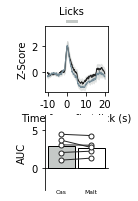

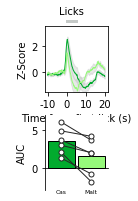

In [45]:
clims = [[-0.15,0.20], [-0.11,0.15]]
peaktype='auc'
epoch=[100,119]

fig1_photo_NR = fig1_photo(df_heatmap, df_photo, 'NR', 'pref1', clims=clims[0],
                                      peaktype=peaktype, epoch=epoch,
                                      keys_traces = ['pref1_cas_licks_forced', 'pref1_malt_licks_forced'],
                                      keys_lats = ['pref1_cas_lats_all', 'pref1_malt_lats_all'])

fig1_photo_PR = fig1_photo(df_heatmap, df_photo, 'PR', 'pref1', clims=clims[1],
                                      peaktype=peaktype, epoch=epoch,
                                      keys_traces = ['pref1_cas_licks_forced', 'pref1_malt_licks_forced'],
                                      keys_lats = ['pref1_cas_lats_all', 'pref1_malt_lats_all'])

fig1_photo_NR.savefig(savefolder + 'fig1_photo_NR.pdf')
fig1_photo_PR.savefig(savefolder + 'fig1_photo_PR.pdf')

In [ ]:
# from 'ppp_pub_figs_settings' import *
# from ppp_pub_figs_fx import *
# from ppp_pub_figs_supp import *

# import os
# os.chdir(os.path.dirname(__file__))
# cwd = os.getcwd()

# import sys
# sys.path.insert(0,cwd)